In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

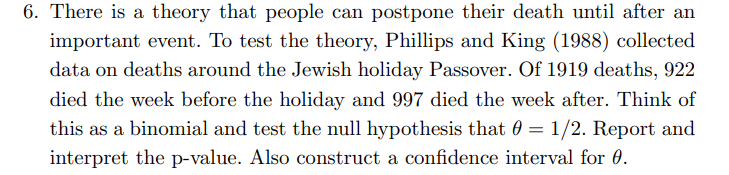

In [4]:
n = 1919
X = 922
theta = 0.5

thetahat = X / n
print(thetahat)

0.48045857217300675


In [3]:
sehat = np.sqrt(thetahat * (1 - thetahat) / n)
print(sehat)

0.011405138868050746


In [8]:
pvalue = 2 * norm.cdf((thetahat - theta) / sehat)
print(pvalue)

w = (thetahat - theta) / sehat

alpha = np.array([0.1, 0.05, 0.01])
for a in alpha:
    C = (thetahat + sehat * norm.ppf(a / 2), thetahat + sehat * norm.ppf(1 - a / 2))
    print((1 - a) * 100, "% confidence interval = ", C)

0.0866411864658904
90.0 % confidence interval =  (0.46169878814000825, 0.49921835620600524)
95.0 % confidence interval =  (0.45810491075294935, 0.5028122335930642)
99.0 % confidence interval =  (0.4510808812656371, 0.5098362630803764)


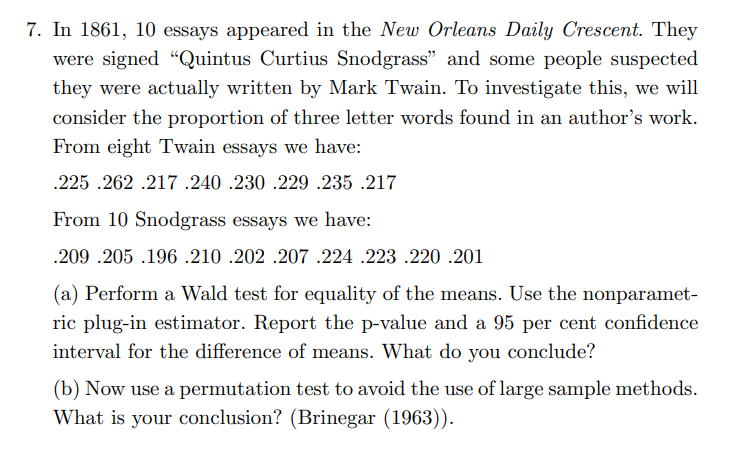

In [31]:
X = np.array([0.225, 0.262, 0.217, 0.24, 0.23, 0.229, 0.235, 0.217])
Y = np.array([0.209, 0.205, 0.196, 0.21, 0.202, 0.207, 0.224, 0.223, 0.22, 0.201])
nX = len(X)
nY = len(Y)

diff = np.mean(X) - np.mean(Y)
se = np.sqrt(np.var(X, ddof=1)/nX + np.var(Y, ddof=1)/nY)
w = diff / se

print("Wald statistic = ", w)

print("p-value = ", 2 * (1 - norm.cdf(np.abs(w))))

Wald statistic =  3.7035535443338206
p-value =  0.00021260028225800198


In [98]:
def random_permutation_test(X, Y, B):

    diff = np.mean(X) - np.mean(Y)
    
    nX = len(X)
    nY = len(Y)
    nZ = nX + nY

    Z = np.concatenate([X, Y])
    Z = np.array([np.random.permutation(Z) for _ in range(B)])

    Xmeans = np.mean(Z[:,:nX], axis = 1)
    Ymeans = np.mean(Z[:, nX:], axis = 1)
    diffs = np.abs(Xmeans - Ymeans)

    iden = (diffs >= diff)
    
    return np.sum(iden) / B

In [99]:
pvalue = random_permutation_test(X, Y, 1000000)
print("p-value = ", pvalue)

p-value =  0.000774


These p-values are small (< 1%), so there is evidence against $H_0: \mu_X = \mu_Y$

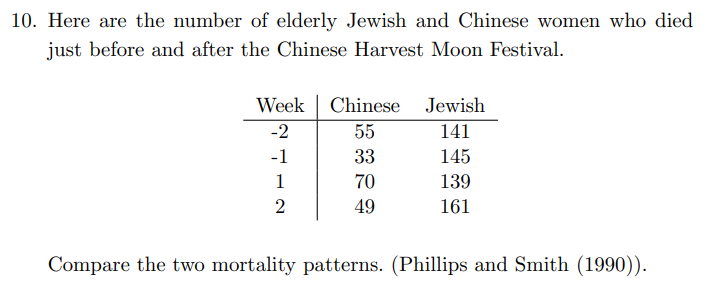

In [166]:
from scipy.stats import chi2

In [100]:
import pandas as pd

In [146]:
chinese = np.array([55, 33, 70, 49])
jewish = np.array([141, 145, 139, 161])

mortality_data = pd.DataFrame({'Chinese': [55, 33, 70, 49],
                               'Jewish': [141, 145, 139, 161]})

In [135]:
X = mortality_data.to_numpy()
ns = np.sum(X, axis = 0)



$\chi^2$ test to see if ratios are 1/4

In [177]:
E = ns * 0.25
teststats = np.sum((X - E) ** 2 / E, axis=0)
print(teststats)


[13.57971014  2.04095563]


In [178]:
pvalues = 1 - chi2.cdf(teststats, df = 3)
print(pvalues)

[0.00353682 0.56394987]


There is evidence to suggest that the proportions for chinese mortalitites is not (1/4, 1/4, 1/4, 1/4)

$\chi^2$ test to see if ratios before and after are 1/2

In [187]:
X2 = np.concatenate([np.sum(X[:2, :], axis=0), np.sum(X[2:, :], axis=0)]).reshape((2,2))
E2 = ns * 0.5

teststats2 = np.sum((X2 - E2) ** 2 / E2, axis = 0)
pvalues2 = 1 - chi2.cdf(teststats2, df=1)
print(pvalues2)

[0.03118932 0.56303819]


Likelihood ratio test

In [141]:
thetas = X / ns

theta1 = thetas[:,0]
theta0 = thetas[:,1]

In [144]:
print(theta1)
print(theta0)

[0.26570048 0.15942029 0.33816425 0.23671498]
[0.24061433 0.24744027 0.23720137 0.27474403]


In [156]:
lda = 2 * np.log(np.sum(chinese * np.log(theta1) - chinese * (np.log(theta0))))
print("lambda = ", lda)

lambda =  4.273142675519324


In [157]:
pvalue = 1 - chi2.cdf(lda, df = 3)
print("p-value = ", pvalue)

p-value =  0.23344017892480529


Binomial Tests

In [205]:
p = np.sum(chinese) / (np.sum(chinese) + np.sum(jewish))
print(p)

0.2610340479192938


In [206]:
from scipy.stats import binomtest

In [207]:
for i in range(len(chinese)):
    pvalue = binomtest(chinese[i], (chinese[i] + jewish[i]), p, alternative = "two-sided")
    print(pvalue)

BinomTestResult(k=55, n=196, alternative='two-sided', statistic=0.28061224489795916, pvalue=0.5163802663589345)
BinomTestResult(k=33, n=178, alternative='two-sided', statistic=0.1853932584269663, pvalue=0.02106098320194904)
BinomTestResult(k=70, n=209, alternative='two-sided', statistic=0.3349282296650718, pvalue=0.017937006072858863)
BinomTestResult(k=49, n=210, alternative='two-sided', statistic=0.23333333333333334, pvalue=0.3880722024926888)


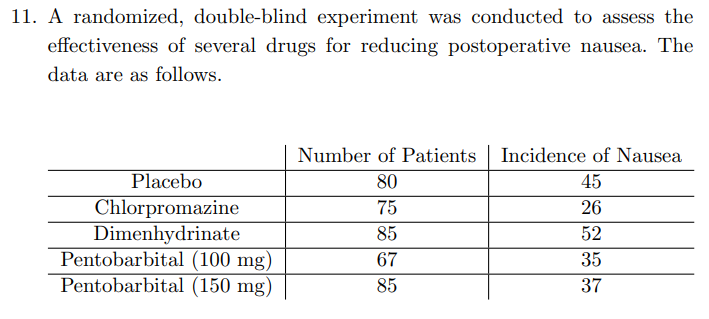
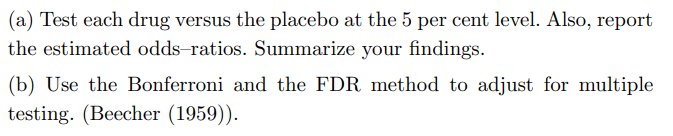

In [245]:
drug_data = pd.DataFrame({
    'Treatment': ['Placebo', 'Chlorpromazine', 'Dimenhydrate', 'Pentobarbital (100 mg)', 'Pentobarbital (150 mg)'],
    'Number of patients': [80, 75, 85, 67, 85],
    'Incidents of Nausea': [45, 26, 52, 35, 37]
})

In [253]:

drug_data['phat'] = drug_data['Incidents of Nausea'] / drug_data['Number of patients']

p0 = drug_data[drug_data['Treatment'] == 'Placebo']['phat'][0]
se0 = np.sqrt(p0 * (1 - p0) / drug_data[drug_data['Treatment'] == 'Placebo']['Number of patients'][0])

0.0554632479665589
0.0554632479665589


In [255]:
drug_data['se'] = np.sqrt(se0 ** 2 + (drug_data['phat'] * (1 - drug_data['phat']) / drug_data['Number of patients']))

In [261]:
drug_data['Wald Statistic'] = (drug_data['phat'] - p0) / drug_data['se']

In [263]:
drug_data['p-value'] = 2 * (1 - norm.cdf(np.abs(drug_data['Wald Statistic'])))

In [272]:
drug_data

,Treatment,Number of patients,Incidents of Nausea,phat,se,Wald Statistic,p-value,Odds Ratio
0,Placebo,80,45,0.562500,0.078437,0.000000,1.000000,1.000000
1,Chlorpromazine,75,26,0.346667,0.078077,-2.764364,0.005703,2.423077
2,Dimenhydrate,85,52,0.611765,0.076618,0.642987,0.520232,0.815934
3,Pentobarbital (100 mg),67,35,0.522388,0.082462,-0.486428,0.626664,1.175510
4,Pentobarbital (150 mg),85,37,0.435294,0.077253,-1.646605,0.099639,1.667954


In [271]:
drug_data['Odds Ratio'] = (1 - drug_data['phat']) / (drug_data['phat']) * (p0 / (1 - p0))

In [265]:
alpha = 0.05

No multiple testing strategy

In [266]:
drug_data[drug_data['p-value'] <= alpha]

,Treatment,Number of patients,Incidents of Nausea,phat,se,Wald Statistic,p-value
1,Chlorpromazine,75,26,0.346667,0.078077,-2.764364,0.005703


Bonferroni Method

In [273]:
drug_data[drug_data['p-value'] <= (alpha / 4)]

,Treatment,Number of patients,Incidents of Nausea,phat,se,Wald Statistic,p-value,Odds Ratio
1,Chlorpromazine,75,26,0.346667,0.078077,-2.764364,0.005703,2.423077


BH method

In [278]:
sorted = drug_data[drug_data['Treatment'] != 'Placebo'].sort_values('p-value')
li = np.arange(1, 5)

In [282]:
li = np.arange(1, 5) * alpha / 4

In [283]:
sorted[sorted['p-value'] <= li]

,Treatment,Number of patients,Incidents of Nausea,phat,se,Wald Statistic,p-value,Odds Ratio
1,Chlorpromazine,75,26,0.346667,0.078077,-2.764364,0.005703,2.423077


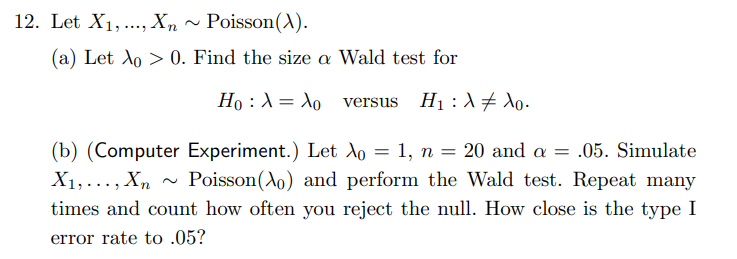

In [285]:
from scipy.stats import poisson

In [340]:
lambda0 = 1
n = 20
alpha = 0.05

N = 1000000

X = poisson.rvs(1, size=(n, N))


In [341]:
lambdahat = X.mean(axis=0)
print(lambdahat[0])

0.75


In [342]:
ws = (lambdahat - lambda0)/np.sqrt(lambdahat / n)
print(ws[0])

-1.2909944487358056


In [343]:
testresult = np.greater_equal(abs(ws), np.abs(norm.ppf(alpha/2)))
print(testresult[0])

False


In [344]:
preject = np.sum(testresult) / N
print(preject)

0.052052
